<a href="https://colab.research.google.com/github/financieras/ai/blob/main/perceptronOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron OR

In [ ]:
import numpy as np

np.random.seed()

# Datos de entrada y salida
X = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
Y = np.array([0, 1, 1, 1])

# Inicialización de pesos y bias
W = np.random.rand(3)  # Ahora W tiene 3 elementos

# Función de activación escalón
def step_function(z):
  return 1 if z >= 0 else 0

# Cálculo de la salida (predicción)
z = np.dot(W, X.T)  # Producto punto
y_pred = np.array([step_function(i) for i in z])

print("Predicciones:", y_pred)
print("Salidas esperadas:", Y)

Predicciones: [1 1 1 1]
Salidas esperadas: [0 1 1 1]


In [ ]:
import numpy as np

# Función de activación sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Datos de entrada y salida (normalizados)
X = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
Y = np.array([0, 1, 1, 1])

# Inicialización de pesos (con un rango más amplio)
W = np.random.uniform(-1, 1, 3)

# Tasa de aprendizaje
learning_rate = 0.1

# Número máximo de iteraciones
max_iter = 1000

# Entrenamiento
for i in range(max_iter):
    # Cálculo de la salida (predicción)
    z = np.dot(W, X.T)
    y_pred = sigmoid(z)

    # Cálculo del error
    error = Y - y_pred

    # Actualización de los pesos
    W += learning_rate * np.dot(error, X)

    # Criterio de parada (error cuadrático medio)
    mse = np.mean((y_pred - Y)**2)
    if mse < 0.01:
        break

# Evaluación del modelo
z = np.dot(W, X.T)
y_pred = np.round(sigmoid(z))  # Redondear a 0 o 1
print("Predicciones:", y_pred)
print("Salidas esperadas:", Y)
print("Número de iteraciones:", i+1)
print("W:", W)

Predicciones: [0. 1. 1. 1.]
Salidas esperadas: [0 1 1 1]
Número de iteraciones: 259
W: [-1.55618692  4.16544769  4.1875243 ]


In [ ]:
import numpy as np

# Función de activación escalón
def step_function(z):
    return 1 if z >= 0 else 0

contador = 0

while True:
    contador += 1

    # Datos de entrada y salida
    X = np.array([[1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])
    Y = np.array([0, 1, 1, 1])

    # Inicialización de pesos y bias
    W = np.random.uniform(-5, 5, 3)  # Genera 3 números aleatorios entre -5 y 5

    # Cálculo de la salida (predicción)
    z = np.dot(X, W)  # Producto punto
    y_pred = np.array([step_function(i) for i in z])

    if np.array_equal(y_pred, Y):
        print("contador:", contador)
        print("Predicciones:", y_pred)
        print("Salidas esperadas:", Y)
        print("Pesos encontrados:", W)
        break

contador: 6
Predicciones: [0 1 1 1]
Salidas esperadas: [0 1 1 1]
Pesos encontrados: [-1.77048446  3.7650508   4.92818268]


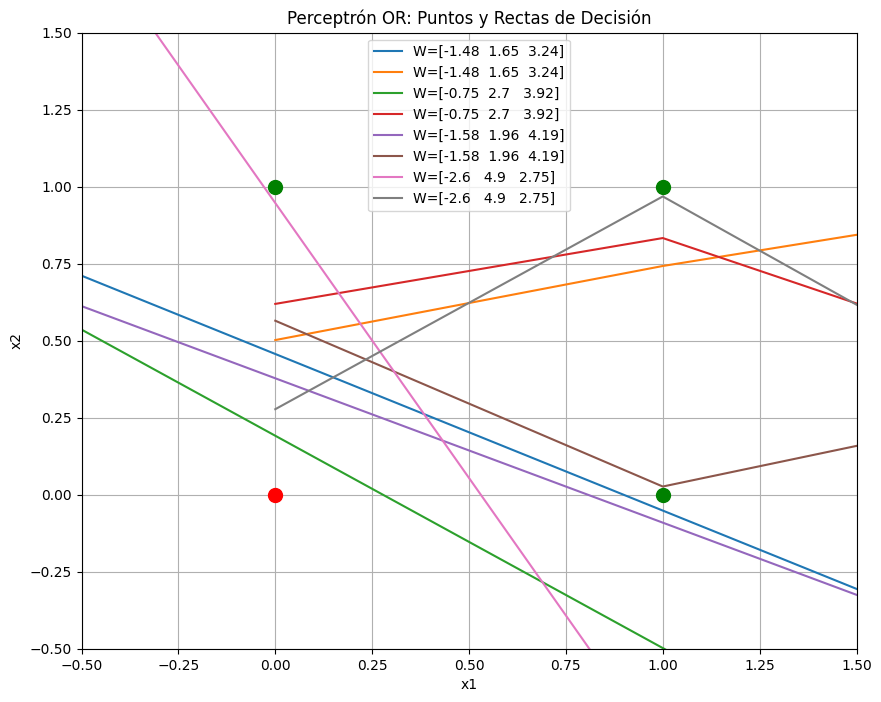

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación escalón
def step_function(z):
    return 1 if z >= 0 else 0

# Función para encontrar pesos que resuelvan OR
def find_or_weights():
    while True:
        W = np.random.uniform(-5, 5, 3)
        X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
        Y = np.array([0, 1, 1, 1])
        z = np.dot(X, W)
        y_pred = np.array([step_function(i) for i in z])
        if np.array_equal(y_pred, Y):
            return W

# Función para dibujar la recta
def plot_line(W, color):
    x = np.linspace(-0.5, 1.5, 100)
    y = (-W[0] - W[1]*x) / W[2]
    plt.plot(x, y, color, label=f'W={W.round(2)}')

# Configurar el gráfico
plt.figure(figsize=(10, 8))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón OR: Puntos y Rectas de Decisión')
plt.grid(True)

# Dibujar los puntos OR
or_points = [(0,0), (0,1), (1,0), (1,1)]
colors = ['red', 'green', 'green', 'green']
for point, color in zip(or_points, colors):
    plt.scatter(point[0], point[1], c=color, s=100, zorder=5)

# Generar y dibujar 4 rectas diferentes
for _ in range(4):
    W = find_or_weights()
    plot_line(W, color=np.random.rand(3,))

plt.legend()
plt.show()